# Usage of Inferential Statistics to analyse salary hypothesis

------------------------

## Author:
[__Gleisson Bispo__](https://github.com/gleissonbispo)


## Hypothesis:
__1. Are salaries in the Brazilian South region higher than the Brazilian North region?__

__2. Between the Brazilian regions have any higher salaries than the others?__


## Data Base:
__Brazilian IBGE - Population Sensus 1970 Sample (data.csv)__



<img src="https://escolakids.uol.com.br/upload/image/mapa-industrial-brasileiro.jpg" width="450">


__<center> Chart: Companies distribution on the Brazil area </center>__


--------------------

## Importing Libraries and Reading Data

In [1]:
#Libraries
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [2]:
#Reading CSV Database
df_ibge = pd.read_csv('data/data.csv')
df_ibge.head()


,Unnamed: 0,id,idade,sexo,anos_estudo,cor/raca,salario,estado_civil,regiao
0,0,1.100190e+10,53,homem,5.0,Parda,63600.000000,1.0,norte
1,1,1.100190e+10,49,mulher,8.0,Amarela,NaN,1.0,norte
2,2,1.100190e+10,22,mulher,11.0,Indigena,4352.400391,0.0,nordeste
3,3,1.100190e+10,55,homem,15.0,Amarela,96600.000000,1.0,norte
4,4,1.100190e+10,56,mulher,15.0,Amarela,157800.000000,1.0,norte


In [3]:
#Key DF information
df_ibge.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66470 entries, 0 to 66469
Data columns (total 9 columns):
Unnamed: 0      66470 non-null int64
id              66470 non-null float64
idade           66470 non-null int64
sexo            66470 non-null object
anos_estudo     66036 non-null float64
cor/raca        66228 non-null object
salario         47878 non-null float64
estado_civil    66470 non-null float64
regiao          66470 non-null object
dtypes: float64(4), int64(2), object(3)
memory usage: 4.6+ MB


### Column information that will be used in the analyzes

In [4]:
#Values and Quantities of the Region (Região) Column
df_ibge['regiao'].value_counts(dropna=False)


sudeste         25220
centro-oeste    14702
norte           14653
sul             11890
nordeste            5
Name: regiao, dtype: int64

In [5]:
#Values and Quantities of the Salary (Salario) Column
df_ibge['salario'].value_counts(dropna=False).nlargest(5)


 NaN         18592
 0.0          1841
-1.0          1101
 999999.0      367
 5229.0        277
Name: salario, dtype: int64

----------------

## Understanding and Preparing Data to Analysis

In [6]:
#Adjusting the DataFrame only with the information that will be used in the analysis
df_ibge = df_ibge[['regiao', 'salario']]
df_ibge.head()


,regiao,salario
0,norte,63600.000000
1,norte,NaN
2,nordeste,4352.400391
3,norte,96600.000000
4,norte,157800.000000


### Splitting DataFrame to each Region
_The DataFrame will be splitted by region and analyzed separately._ ___Due the low amount of values, the Northeast region will not be considered in the analysis!___

## Southeast Region

In [7]:
#Creating a new Data Frame with information from the Southeast region
df_southeast = df_ibge[df_ibge['regiao'] == 'sudeste']
df_southeast.head()


,regiao,salario
14657,sudeste,52800.0
14658,sudeste,39600.0
14659,sudeste,NaN
14660,sudeste,NaN
14661,sudeste,13200.0


In [8]:
#DF Information
df_southeast.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 25220 entries, 14657 to 39876
Data columns (total 2 columns):
regiao     25220 non-null object
salario    18043 non-null float64
dtypes: float64(1), object(1)
memory usage: 591.1+ KB


___Due the significant amount of null values, the mean of "confident" values will be considered as replacement for these values (-1, 999999 and NaN)___

In [9]:
#Defining a variable with average salary (without considering null salary values -1, 999999 e NaN)
mean_sal_sout = df_southeast[(df_southeast['salario'] >= 0) & (df_southeast['salario'] < 999999)].salario.mean()
mean_sal_sout


12866.992875175598

In [10]:
#Replacing null values (-1, 999999 and NaN) by the mean
df_southeast['salario'].fillna(mean_sal_sout, inplace = True)
df_southeast['salario'].replace(-1, mean_sal_sout, inplace = True)
df_southeast['salario'].replace(999999, mean_sal_sout, inplace = True)


In [11]:
df_southeast['salario'].value_counts().nlargest(5)


12866.992875    7748
0.000000         413
7200.000000       92
5079.599609       85
4980.000000       81
Name: salario, dtype: int64

In [12]:
#verifying new DF info
df_southeast.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 25220 entries, 14657 to 39876
Data columns (total 2 columns):
regiao     25220 non-null object
salario    25220 non-null float64
dtypes: float64(1), object(1)
memory usage: 591.1+ KB


## Midwest Region

In [13]:
#Creating a new Data Frame with information from the Midwest region
df_midw = df_ibge[df_ibge['regiao'] == 'centro-oeste']
df_midw.head()


,regiao,salario
51767,centro-oeste,24480.000000
51768,centro-oeste,NaN
51769,centro-oeste,3816.000000
51770,centro-oeste,5342.400391
51771,centro-oeste,6204.000000


In [14]:
#DF Information
df_midw.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14702 entries, 51767 to 66469
Data columns (total 2 columns):
regiao     14702 non-null object
salario    10320 non-null float64
dtypes: float64(1), object(1)
memory usage: 344.6+ KB


In [15]:
#Defining a variable with average salary (without considering null salary values -1, 999999 e NaN)
mean_sal_midw = df_midw[(df_midw['salario'] >= 0) & (df_midw['salario'] < 999999)].salario.mean()
mean_sal_midw


13677.469600206254

In [16]:
#Replacing null values (-1, 999999 and NaN) by the mean
df_midw['salario'].fillna(mean_sal_midw, inplace = True)
df_midw['salario'].replace(-1, mean_sal_midw, inplace = True)
df_midw['salario'].replace(999999, mean_sal_midw, inplace = True)


In [17]:
df_midw['salario'].value_counts().nlargest(5)


13677.4696    4741
0.0000         220
5229.0000      109
7560.0000       86
9600.0000       76
Name: salario, dtype: int64

In [18]:
#verifying new DF info
df_midw.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14702 entries, 51767 to 66469
Data columns (total 2 columns):
regiao     14702 non-null object
salario    14702 non-null float64
dtypes: float64(1), object(1)
memory usage: 344.6+ KB


## North Region

In [19]:
#Creating a new Data Frame with information from the North region
df_north = df_ibge[df_ibge['regiao'] == 'norte']
df_north.head()


,regiao,salario
0,norte,63600.000000
1,norte,NaN
3,norte,96600.000000
4,norte,157800.000000
6,norte,6734.400391


In [20]:
#DF Information
df_north.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14653 entries, 0 to 14656
Data columns (total 2 columns):
regiao     14653 non-null object
salario    10466 non-null float64
dtypes: float64(1), object(1)
memory usage: 343.4+ KB


In [21]:
#Defining a variable with average salary (without considering null salary values -1, 999999 e NaN)
mean_sal_nor = df_north[(df_north['salario'] >= 0) & (df_north['salario'] < 999999)].salario.mean()
mean_sal_nor


10048.120711533555

In [22]:
#Replacing null values (-1, 999999 and NaN) by the mean
df_north['salario'].fillna(mean_sal_nor, inplace = True)
df_north['salario'].replace(-1, mean_sal_nor, inplace = True)
df_north['salario'].replace(999999, mean_sal_nor, inplace = True)


In [23]:
df_north['salario'].value_counts().nlargest(5)

10048.120712    4446
0.000000         700
5229.000000       93
7560.000000       79
2520.000000       73
Name: salario, dtype: int64

In [24]:
#verifying new DF info
df_north.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14653 entries, 0 to 14656
Data columns (total 2 columns):
regiao     14653 non-null object
salario    14653 non-null float64
dtypes: float64(1), object(1)
memory usage: 343.4+ KB


## South Region

In [25]:
#Creating a new Data Frame with information from the South region
df_south = df_ibge[df_ibge['regiao'] == 'sul']
df_south.head()


,regiao,salario
39877,sul,8547.0
39878,sul,-1.0
39879,sul,NaN
39880,sul,NaN
39881,sul,3975.0


In [26]:
#DF Information
df_south.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11890 entries, 39877 to 51766
Data columns (total 2 columns):
regiao     11890 non-null object
salario    9046 non-null float64
dtypes: float64(1), object(1)
memory usage: 278.7+ KB


In [27]:
#Defining a variable with average salary (without considering null salary values -1, 999999 e NaN)
mean_sal_sou = df_south[(df_south['salario'] >= 0) & (df_south['salario'] < 999999)].salario.mean()
mean_sal_sou


12867.547667341656

In [28]:
#Replacing null values (-1, 999999 and NaN) by the mean
df_south['salario'].fillna(mean_sal_sou, inplace = True)
df_south['salario'].replace(-1, mean_sal_sou, inplace = True)
df_south['salario'].replace(999999, mean_sal_sou, inplace = True)


In [29]:
df_south['salario'].value_counts().nlargest(5)


12867.547667    3123
0.000000         508
12000.000000      55
9600.000000       45
6000.000000       44
Name: salario, dtype: int64

In [30]:
#verifying new DF info
df_south.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11890 entries, 39877 to 51766
Data columns (total 2 columns):
regiao     11890 non-null object
salario    11890 non-null float64
dtypes: float64(1), object(1)
memory usage: 278.7+ KB


--------------

## Normalizing the data and applying the inference

## Southeast Region

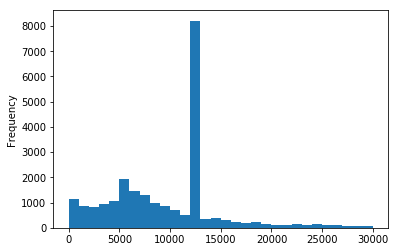

In [31]:
#Verifying the salary distribution in the Southeast region
df_southeast['salario'].plot(kind='hist', bins=30, range=(0, 30000))


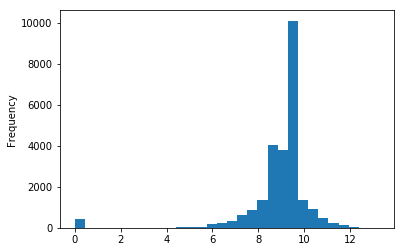

In [32]:
#Creating a column with the logarithms of salaries to correct asymmetry and plotting the new distribution
df_southeast['salary_log'] = np.log1p(df_southeast['salario'])
df_southeast['salary_log'].plot(kind='hist', bins=30)


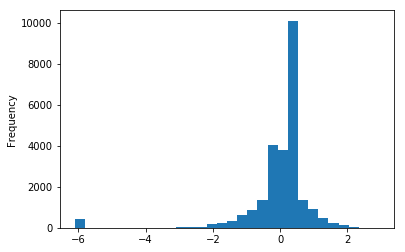

In [33]:
# Creating a column with the normalized values of logs to extract: z-score and confidence interval
df_southeast['norm_salary_log'] = ((df_southeast['salary_log'] - 
                                    df_southeast['salary_log'].mean()) / 
                                    df_southeast['salary_log'].std())
df_southeast['norm_salary_log'].plot(kind='hist', bins=30)


### Calculating confidence interval and z-score for a 10000 salaries sample (Confidence Level 95%)

In [34]:
#Defining the Sample
sample_southeast = df_southeast.norm_salary_log.sample(10000)

#Sample's mean
mean_southeast = np.mean(sample_southeast)

#Sample's standard deviation
std_southeast = np.std(sample_southeast)

#Sample's length
n_southeast = len(sample_southeast)


In [35]:
#Confidence Interval
under_limit_southest = st.norm.interval(alpha=.95, loc=mean_southeast, scale=std_southeast/np.sqrt(n_southeast))[0]
upper_limit_southest = st.norm.interval(alpha=.95, loc=mean_southeast, scale=std_southeast/np.sqrt(n_southeast))[1]

print(f'{under_limit_southest:.4f} <-----> {upper_limit_southest:.4f}')


-0.0239 <-----> 0.0152


In [36]:
#z-score
z_upper_southest = st.ttest_1samp(sample_southeast, under_limit_southest)[0]
z_under_southest = st.ttest_1samp(sample_southeast, upper_limit_southest)[0]

print(f'{z_under_southest:.4f} <-----> {z_upper_southest:.4f}')


-1.9599 <-----> 1.9599


## Midwest Region

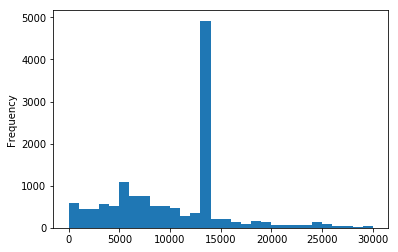

In [37]:
#Verifying the salary distribution in the Midwest region
df_midw['salario'].plot(kind='hist', bins=30, range=(0, 30000))


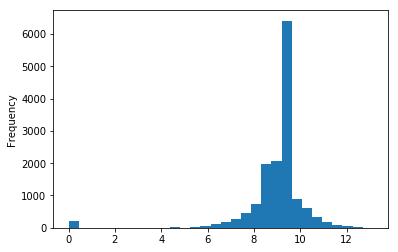

In [38]:
#Creating a column with the logarithms of salaries to correct asymmetry and plotting the new distribution
df_midw['salary_log'] = np.log1p(df_midw['salario'])
df_midw['salary_log'].plot(kind='hist', bins=30)


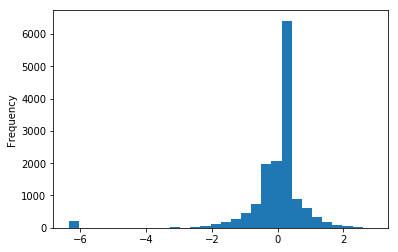

In [39]:
# Creating a column with the normalized values of logs to extract: z-score and confidence interval
df_midw['norm_salary_log'] = ((df_midw['salary_log'] - 
                               df_midw['salary_log'].mean()) / 
                               df_midw['salary_log'].std())
df_midw['norm_salary_log'].plot(kind='hist', bins=30)


### Calculating confidence interval and z-score for a 10000 salaries sample (Confidence Level 95%)

In [40]:
#Defining the Sample
sample_midwest = df_midw.norm_salary_log.sample(10000)

#Sample's mean
mean_midwest = np.mean(sample_midwest)

#Sample's standard deviation
std_midwest = np.std(sample_midwest)

#Sample's length
n_midwest = len(sample_midwest)


In [41]:
#Confidence Interval
under_limit_midwest = st.norm.interval(alpha=.95, loc=mean_midwest, scale=std_midwest/np.sqrt(n_midwest))[0]
upper_limit_midwest = st.norm.interval(alpha=.95, loc=mean_midwest, scale=std_midwest/np.sqrt(n_midwest))[1]

print(f'{under_limit_midwest:.4f} <-----> {upper_limit_midwest:.4f}')


-0.0240 <-----> 0.0156


In [42]:
#z-score
z_upper_midwest = st.ttest_1samp(sample_midwest, under_limit_midwest)[0]
z_under_midwest = st.ttest_1samp(sample_midwest, upper_limit_midwest)[0]

print(f'{z_under_midwest:.4f} <-----> {z_upper_midwest:.4f}')


-1.9599 <-----> 1.9599


## North Region

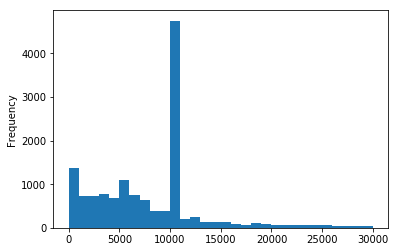

In [43]:
#Verifying the salary distribution in the North region
df_north['salario'].plot(kind='hist', bins=30, range=(0, 30000))


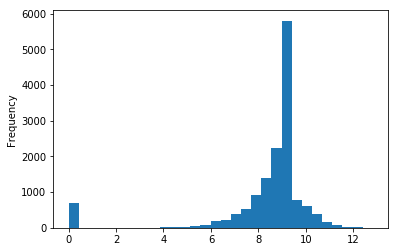

In [44]:
#Creating a column with the logarithms of salaries to correct asymmetry and plotting the new distribution
df_north['salary_log'] = np.log1p(df_north['salario'])
df_north['salary_log'].plot(kind='hist', bins=30)


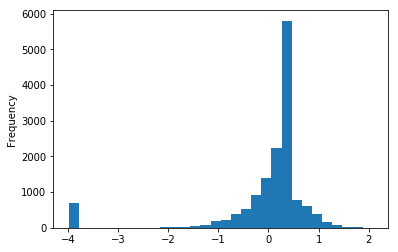

In [45]:
# Creating a column with the normalized values of logs to extract: z-score and confidence interval
df_north['norm_salary_log'] = ((df_north['salary_log'] - 
                                df_north['salary_log'].mean()) / 
                                df_north['salary_log'].std())
df_north['norm_salary_log'].plot(kind='hist', bins=30)


### Calculating confidence interval and z-score for a 10000 salaries sample (Confidence Level 95%)

In [46]:
#Defining the Sample
sample_north = df_north.norm_salary_log.sample(10000)

#Sample's mean
mean_north = np.mean(sample_north)

#Sample's standard deviation
std_north = np.std(sample_north)

#Sample's length
n_north = len(sample_north)


In [47]:
#Confidence Interval
under_limit_north = st.norm.interval(alpha=.95, loc=mean_north, scale=std_north/np.sqrt(n_north))[0]
upper_limit_north = st.norm.interval(alpha=.95, loc=mean_north, scale=std_north/np.sqrt(n_north))[1]

print(f'{under_limit_north:.4f} <-----> {upper_limit_north:.4f}')


-0.0149 <-----> 0.0241


In [48]:
#z-score
z_upper_north = st.ttest_1samp(sample_north, under_limit_north)[0]
z_under_north = st.ttest_1samp(sample_north, upper_limit_north)[0]

print(f'{z_under_north:.4f} <-----> {z_upper_north:.4f}')


-1.9599 <-----> 1.9599


## South Region

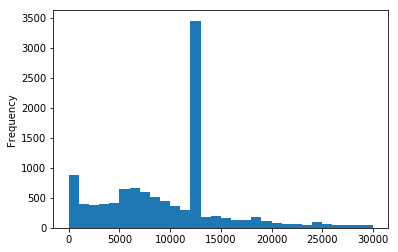

In [49]:
#Verifying the salary distribution in the South region
df_south['salario'].plot(kind='hist', bins=30, range=(0, 30000))


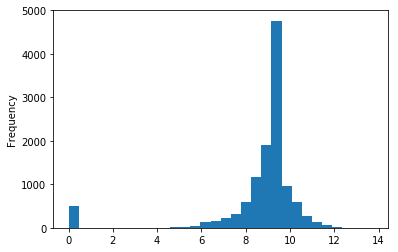

In [50]:
#Creating a column with the logarithms of salaries to correct asymmetry and plotting the new distribution
df_south['salary_log'] = np.log1p(df_south['salario'])
df_south['salary_log'].plot(kind='hist', bins=30)


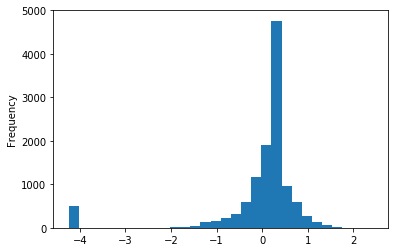

In [51]:
# Creating a column with the normalized values of logs to extract: z-score and confidence interval
df_south['norm_salary_log'] = ((df_south['salary_log'] - 
                                df_south['salary_log'].mean()) / 
                                df_south['salary_log'].std())
df_south['norm_salary_log'].plot(kind='hist', bins=30)


### Calculating confidence interval and z-score for a 10000 salaries sample (Confidence Level 95%)

In [52]:
#Defining the Sample
sample_south = df_south.norm_salary_log.sample(10000)

#Sample's mean
mean_south = np.mean(sample_south)

#Sample's standard deviation
std_south = np.std(sample_south)

#Sample's length
n_south = len(sample_south)


In [53]:
#Confidence Interval
under_limit_south = st.norm.interval(alpha=.95, loc=mean_south, scale=std_south/np.sqrt(n_south))[0]
upper_limit_south = st.norm.interval(alpha=.95, loc=mean_south, scale=std_south/np.sqrt(n_south))[1]

print(f'{under_limit_south:.4f} <-----> {upper_limit_south:.4f}')


-0.0195 <-----> 0.0197


In [54]:
#z-score
z_upper_south = st.ttest_1samp(sample_south, under_limit_south)[0]
z_under_south = st.ttest_1samp(sample_south, upper_limit_south)[0]

print(f'{z_under_south:.4f} <-----> {z_upper_south:.4f}')


-1.9599 <-----> 1.9599


------------------

## Analysing Results

### Hypothesis:
__1. Are salaries in the Brazilian South region higher than the Brazilian North region?__

__2. Between the Brazilian regions have any higher salaries than the others?__


In [55]:
# Defining the mean of the normalized salaries to each region

print(f'Mean Southest: {mean_southeast:.3f}')
print(f'Mean Midwest: {mean_midwest:.3f}')
print(f'Mean North: {mean_north:.3f}')
print(f'Mean South: {mean_south:.3f}')


Mean Southest: -0.004
Mean Midwest: -0.004
Mean North: 0.005
Mean South: 0.000


### Verifying Hypothesis 1:
__1. Are salaries in the Brazilian South region higher than the Brazilian North region?__

In [56]:
print(f'''Is the North Salary mean under the South Salary Conf. Interval? 
-> {under_limit_south < mean_north < upper_limit_south}''')

Is the North Salary mean under the South Salary Conf. Interval? 
-> True


In [57]:
p_value = st.ttest_1samp(sample_south, mean_north)[1]/2
print(f''' p-value North Salary under the South Salary Conf. Interval: 
-> {p_value * 100:.2f}%''')

 p-value North Salary under the South Salary Conf. Interval: 
-> 32.71%


We can affirm with 95% certainty based on that Data Base, the average of the **North Region** salary is contained in the confidence interval of the salaries of the **South Region**.
Therefore: **Reject $H_0$**

### Verifying Hypothesis 2:
__2. Between the Brazilian regions have any higher salaries than the others?__


### Southeast Region

In [58]:
print(f'''Is the Midwest Salary mean under the Southeast Salary Conf. Interval?
-> {under_limit_southest < mean_midwest < upper_limit_southest}\n''')

p_value = st.ttest_1samp(sample_southeast, mean_midwest)[1]/2
print(f'''p-value Midwest Salary under the Southeast Salary Conf. Interval:
-> {p_value * 100:.2f}%''')

print('\n', '-' * 65, '\n')


print(f'''Is the North Salary mean under the Southeast Salary Conf. Interval?
-> {under_limit_southest < mean_north < upper_limit_southest}\n''')

p_value = st.ttest_1samp(sample_southeast, mean_north)[1]/2
print(f'''p-value North Salary under the Southeast Salary Conf. Interval:
-> {p_value * 100:.2f}%''')

print('\n', '-' * 65, '\n')


print(f'''Is the South Salary mean under the Southeast Salary Conf. Interval?
-> {under_limit_southest < mean_south < upper_limit_southest}\n''')

p_value = st.ttest_1samp(sample_southeast, mean_south)[1]/2
print(f'''p-value South Salary under the Southeast Salary Conf. Interval:
-> {p_value * 100:.2f}%''')


Is the Midwest Salary mean under the Southeast Salary Conf. Interval?
-> True

p-value Midwest Salary under the Southeast Salary Conf. Interval:
-> 49.48%

 ----------------------------------------------------------------- 

Is the North Salary mean under the Southeast Salary Conf. Interval?
-> True

p-value North Salary under the Southeast Salary Conf. Interval:
-> 18.51%

 ----------------------------------------------------------------- 

Is the South Salary mean under the Southeast Salary Conf. Interval?
-> True

p-value South Salary under the Southeast Salary Conf. Interval:
-> 32.72%


### Midwest Region

In [59]:
print(f'''Is the Southeast Salary mean under the Midwest Salary Conf. Interval?
-> {under_limit_midwest < mean_southeast < upper_limit_midwest}\n''')

p_value = st.ttest_1samp(sample_midwest, mean_southeast)[1]/2
print(f'''p-value Southeast Salary under the Midwest Salary Conf. Interval:
-> {p_value * 100:.2f}%''')

print('\n', '-' * 65, '\n')


print(f'''Is the North Salary mean under the Midwest Salary Conf. Interval?
-> {under_limit_midwest < mean_north < upper_limit_midwest}\n''')

p_value = st.ttest_1samp(sample_midwest, mean_north)[1]/2
print(f'''p-value North Salary under the Midwest Salary Conf. Interval:
-> {p_value * 100:.2f}%''')

print('\n', '-' * 65, '\n')


print(f'''Is the South Salary mean under the Midwest Salary Conf. Interval?
-> {under_limit_midwest < mean_south < upper_limit_midwest}\n''')

p_value = st.ttest_1samp(sample_midwest, mean_south)[1]/2
print(f'''p-value South Salary under the Midwest Salary Conf. Interval:
-> {p_value * 100:.2f}%''')


Is the Southeast Salary mean under the Midwest Salary Conf. Interval?
-> True

p-value Southeast Salary under the Midwest Salary Conf. Interval:
-> 49.49%

 ----------------------------------------------------------------- 

Is the North Salary mean under the Midwest Salary Conf. Interval?
-> True

p-value North Salary under the Midwest Salary Conf. Interval:
-> 19.12%

 ----------------------------------------------------------------- 

Is the South Salary mean under the Midwest Salary Conf. Interval?
-> True

p-value South Salary under the Midwest Salary Conf. Interval:
-> 33.37%


### North Region

In [60]:
print(f'''Is the Southeast Salary mean under the North Salary Conf. Interval?
-> {under_limit_north < mean_southeast < upper_limit_north}\n''')

p_value = st.ttest_1samp(sample_north, mean_southeast)[1]/2
print(f'''p-value Southeast Salary under the North Salary Conf. Interval:
-> {p_value * 100:.2f}%''')

print('\n', '-' * 65, '\n')


print(f'''Is the Midwest Salary mean under the North Salary Conf. Interval?
-> {under_limit_north < mean_midwest < upper_limit_north}\n''')

p_value = st.ttest_1samp(sample_north, mean_midwest)[1]/2
print(f'''p-value Midwest Salary under the North Salary Conf. Interval:
-> {p_value * 100:.2f}%''')

print('\n', '-' * 65, '\n')


print(f'''Is the South Salary mean under the North Salary Conf. Interval?
-> {under_limit_north < mean_south < upper_limit_north}\n''')

p_value = st.ttest_1samp(sample_north, mean_south)[1]/2
print(f'''p-value South Salary under the North Salary Conf. Interval:
-> {p_value * 100:.2f}%''')


Is the Southeast Salary mean under the North Salary Conf. Interval?
-> True

p-value Southeast Salary under the North Salary Conf. Interval:
-> 18.40%

 ----------------------------------------------------------------- 

Is the Midwest Salary mean under the North Salary Conf. Interval?
-> True

p-value Midwest Salary under the North Salary Conf. Interval:
-> 18.75%

 ----------------------------------------------------------------- 

Is the South Salary mean under the North Salary Conf. Interval?
-> True

p-value South Salary under the North Salary Conf. Interval:
-> 32.61%


### South Region

In [61]:
print(f'''Is the Southeast Salary mean under the South Salary Conf. Interval?
-> {under_limit_south < mean_southeast < upper_limit_south}\n''')

p_value = st.ttest_1samp(sample_south, mean_southeast)[1]/2
print(f'''p-value Southeast Salary under the South Salary Conf. Interval:
-> {p_value * 100:.2f}%''')

print('\n', '-' * 65, '\n')


print(f'''Is the Midwest Salary mean under the South Salary Conf. Interval?
-> {under_limit_south < mean_midwest < upper_limit_south}\n''')

p_value = st.ttest_1samp(sample_south, mean_midwest)[1]/2
print(f'''p-value Midwest Salary under the South Salary Conf. Interval:
-> {p_value * 100:.2f}%''')

print('\n', '-' * 65, '\n')


print(f'''Is the North Salary mean under the South Salary Conf. Interval?
-> {under_limit_south < mean_north < upper_limit_south}\n''')

p_value = st.ttest_1samp(sample_south, mean_north)[1]/2
print(f'''p-value North Salary under the South Salary Conf. Interval:
-> {p_value * 100:.2f}%''')


Is the Southeast Salary mean under the South Salary Conf. Interval?
-> True

p-value Southeast Salary under the South Salary Conf. Interval:
-> 32.75%

 ----------------------------------------------------------------- 

Is the Midwest Salary mean under the South Salary Conf. Interval?
-> True

p-value Midwest Salary under the South Salary Conf. Interval:
-> 33.21%

 ----------------------------------------------------------------- 

Is the North Salary mean under the South Salary Conf. Interval?
-> True

p-value North Salary under the South Salary Conf. Interval:
-> 32.71%


We can affirm with 95% certainty based on that Data Base, the average of **all regions** salaries are contained in the  **all regions** salaries confidence interval.
Therefore: **Reject $H_0$**